# Question 1- Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
from math import e
from math import pi , tan , cos
from math import factorial
import gaussxw as gs # import gauss functions downloaded 
                #online that define gaussxw and gaussxwab as in class

# Part A (wavefunctions)

We must first define a function to calculate $H_n$, the $n^\text{th}$ order Hermite polynomial evaluated at $x$. There are two ways to do this, the first would be to define $H_n$ as a separate function and call it for each $x$, which would be computationally cheaper. This is hard to do however due to the lack of analytical expressions for $H_n$, so instead we opt to directly iterate $H_n(x)$ for each given $x$ value.

To be able to iterate to a desired order $n$ we use the given recursion formula:
\begin{equation}
H_{n+1} = 2xH_n - 2nH_{n-1}
\end{equation}
as well as the initial conditions $H_0=1$ and $H_1=2x$

In [49]:
# Function to calculate Hn
def calchermite(n,x):
    '''INPUT: Desired order of Hermite Polnomial, x value to calculate
    OUTPUT: Hermite polynomial of that order evaluated at x'''
    # define first 2 polynomial terms
    hn0 = 1
    hn1 = 2*x
    # We will loop and recursively define these. Initialize them.
    nth = hn0
    np1th = hn1
    # loop over desired order using given recursion formula
    for i in range(1,n+1):
        nm1th = nth # reset Hn-1 term
        nth = np1th # reset Hn term
        np1th = 2*x*nth - 2*i*nm1th # define Hn+1 term
    if n==0: return 1 
    elif n==1: return 2*x
    else: return nth # Return desired order of H

We also now define a function to return the $n^\text{th}$ wavefunction of a harmonic oscilator at a given $x$. The formula is given as:
\begin{equation}
\psi_n(x) = \frac{1}{\sqrt{2^nn!\sqrt{\pi}}} e^{-x^2/2} H_n(x),
\end{equation}
which calls the previously defined function calchermite at the particular x value being used.

In [50]:
def wavefunction(n,x):
    '''Returns the wavefunction of a SHO of order n at value x. Uses function calchermite(n,x)'''
    return (1./np.sqrt(float(2**n)*float(factorial(n))*np.sqrt(pi)))*e**((-x**2)/2.)*calchermite(n,x)

Now use these defined functions to plot the first 4 wavefunctions of the SHO ($n \in [0,3]$) from $x=-4$ to $x=4$

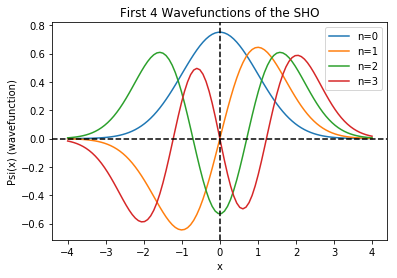

In [51]:
xvalues = np.linspace(-4,4,100) # Define array of 100 x values in given range on which to plot functions
yvalues0 = [] # Define empty lists for which to store wavefunction values for each n
yvalues1 = []
yvalues2 = []
yvalues3 = []

# Now calculate the wavefunction values for each x value
for x in xvalues: # loop through values in xvalues array
    yvalues0.append(wavefunction(0,x)) # calculate wavefunction value by calling wavefunction and append
    yvalues1.append(wavefunction(1,x)) # the result to the yvalues list for each x value
    yvalues2.append(wavefunction(2,x)) # We are left with 4 different lists of the same size as xvalues
    yvalues3.append(wavefunction(3,x)) # but include the y values for the different wavefunctions

# plot the results
plt.figure()
plt.plot(xvalues, yvalues0, label = 'n=0')
plt.plot(xvalues, yvalues1, label = 'n=1')
plt.plot(xvalues, yvalues2, label = 'n=2')
plt.plot(xvalues, yvalues3, label = 'n=3')
plt.legend(loc='best')
plt.title('First 4 Wavefunctions of the SHO')
plt.xlabel('x')
plt.ylabel('Psi(x) (wavefunction)')
plt.axvline(x=0.0,linestyle='--',color='black')
plt.axhline(y=0.0,linestyle='--',color='black')
plt.plot()
plt.show()

 # Part B (higher wavefunction)

We will now use the same function as defined above but do it for a much higher value of $n=30$ to test if our code works quickly enough. As before, define an xarray and empty yarray, then calculate the result by calling the function wavefunction(n,x)

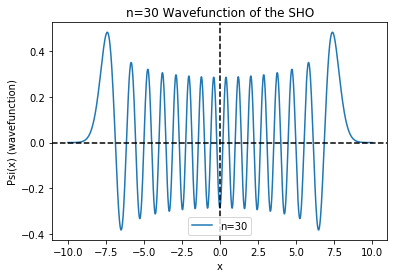

In [52]:
xvalues2 = np.linspace(-10,10,1000) # Define new x array, but now with 1000 points! (to make graph smoother)
yvalues30 = []  # Define empty list for which to store wavefunction values for each n

# Now calculate the wavefunction values for each x value
for x in xvalues2: # loop through values in xvalues array
    yvalues30.append(wavefunction(30,x)) # Calculate result and append to list

# Plot result
plt.figure()
plt.plot(xvalues2, yvalues30, label = 'n=30')
plt.legend(loc='best')
plt.title('n=30 Wavefunction of the SHO')
plt.xlabel('x')
plt.ylabel('Psi(x) (wavefunction)')
plt.axvline(x=0.0,linestyle='--',color='black')
plt.axhline(y=0.0,linestyle='--',color='black')
plt.plot()
plt.show()

The result is calculated and plotted in less than a second, meaning that even though our definition of Hermite polynomials wasnt ideal, its still not too bad. The code is able to loop through 30 n values for 1000 values of x and plot them all in a very short period of time. Computers are awesome!

# Part C (expectation values and uncertainty)

We use the definition of the following values for the remainder of the question:
\begin{equation}
\left\langle x^2 \right\rangle = \int_{-\infty}^{\infty} x^2 | \psi_n(x) |^2 dx
\end{equation}
\begin{equation}
\left\langle x \right\rangle = \int_{-\infty}^{\infty} x | \psi_n(x) |^2 dx = 0
\end{equation}

\begin{equation}
\left\langle p^2 \right\rangle = \int_{-\infty}^{\infty} \Big| \frac{\text{d}\psi_n(x)}{\text{d}x} \Big|^2 dx
\end{equation}
\begin{equation}
\left\langle p \right\rangle = \int_{-\infty}^{\infty} \psi_n^*(x) (-i) \frac{\text{d}}{\text{d}x} \psi_n(x) dx = 0
\end{equation}

We included the fact that $\left\langle x \right\rangle = \left\langle p \right\rangle = 0$ for the Quantum SHO. We use these definitions to calculate additional quatities, including Energy:
\begin{equation}
E = \frac{1}{2} ( \left\langle x^2 \right\rangle + \left\langle p^2 \right\rangle ),
\end{equation}

as well as uncertainty (taken from the statistical definition of standard deviation), where we again use the fact that $\left\langle x \right\rangle = \left\langle p \right\rangle = 0$ for the Quantum SHO:
\begin{equation}
\Delta x = \sqrt{\left\langle x^2 \right\rangle - \left\langle x \right\rangle ^2} \sqrt{\left\langle x^2 \right\rangle}
\end{equation}
\begin{equation}
\Delta p = \sqrt{\left\langle p^2 \right\rangle - \left\langle p \right\rangle ^2} = \sqrt{\left\langle p^2 \right\rangle}
\end{equation}

In [58]:
# Define position and momentum qwuared according to definitions

def momsquared(n,x):
    return x**2 * wavefunction(n,x)**2

def possquared(n,x):
    return x**2 * wavefunction(n,x)**2

But we want to convert to infinite domain:

We will change the variables with the substitution x=(z/1-z^2)
This changes the integrand to: func(n,(x/1-x^2))*(1+x^2)/(1-x^2)^2

In [60]:
def momsquaredinf(n,z): # define integrand using substitution
    return momsquared(n,z/(1-z**2))*(1+z**2)/(1-z**2)**2

def possquaredinf(n,z): # define integrand using substitution
    return possquared(n,z/(1-z**2))*(1+z**2)/(1-z**2)**2

def integrateinf(func,n,N):
    '''Function to integrate a function from -inf to inf using gaussian quadrature
    INPUT: desired function to integrate (using normal variable defined on -inf to inf),
           order n of the function, and N integration points
    OUTPUT: value of integral'''
    z,w = gs.gaussxwab(N,-1,1) # map integration points & weights to -1 and 1 using gauss module
    s = 0.0 # initialize integral sum
    for k in range(N): # look over integration points
        s += w[k]*func(n,z[k]) # add slice to sum
    return s # return total integration sum

In [61]:
z,w = gs.gaussxwab(100,-1,1)
s = 0.0 # initialize integral sum
for k in range(100): # look over integration points
    #print(z[k])
    calchermite(3,z[k])
    s += w[k]*wavefunction(3,z[k]) # add slice to sum
s # return total integration sum
integrateinf(momsquaredinf,3,100)

TypeError: 'numpy.float64' object is not callable

Now we can use all of these functions to evaluate specific things for various n values!

In [59]:
# Initialize lists to store values
possquaredvals = []
momsquaredvals = []
energyvals = []

for n in range(0,16):
    # perform integrations for n value
    possquared = integrateinf(possquared,n,100)
    momsquared = integrateinf(momsquared,n,100)
    # append values to list
    possquaredvals.append(possquared)
    momsquaredvals.append(momsquared)
    energyvals.append(0.5*(momsquared + possquared))

TypeError: 'numpy.float64' object is not callable

Note: It was all working before but just before handing it in we deleted a bunch of things and now everything is lost... plus we have this stupid error :( Im sorry